Tris et recherches
==================

Pour rechercher une valeur dans un tableau lorsque celui-ci n’est pas trié, il n’y a pas de meilleur algorithme que la recherche linéaire, qui parcourt l’ensemble du tableau. Sur un tableau trié on préfère généralement utiliser ce qu’en informatique on appelle la **recherche dichotomique** (*binary search* en anglais). Cette activité introduit la recherche dichotomique, puis compare son efficacité avec la recherche linéaire. Les codes de l’activités sont dans le fichier `activite_dicho.py`.

Recherche dichotomique : le principe
------------------------------------

Vous avez certainement déjà utilisé le principe de la recherche dichotomique dans la vie courante. Par exemple, lorsque vous cherchez un mot dans le dictionnaire ou la page n<sup>o</sup> x d’un livre, vous ne parcourez pas toutes les pages : vous diminuez progressivement l’intervalle (le « pas ») de votre recherche jusqu’à trouver la page cherchée. De même lorsque vous pesez un ingrédient sur une balance, vous affinez probablement vos versements en approchant de la valeur désirée. La recherche dichotomique (du grec *tomós* "coupure" et *díkha* "en deux") applique cette idée d’affiner progressivement l’espace de recherche, en le divisant par deux jusqu’à trouver une valeur satisfaisante.

Pour cette activité, nos fonctions de recherche vont retourner l’indice dans un tableau trié de l’élément à retourner, ou -1 s’il n’y en a pas. Voici un exemple d’implémentation en Python :



In [ ]:
def recherche_dichotomique(t, val):
    """ entrée: tableau t trié par ordre croissant, valeur val
    résultat: indice i tel que t[i] == val, ou -1 si val not in t."""
    idx_left = 0
    idx_right = len(t)-1
    while idx_left <= idx_right:
        idx_mid = (idx_left + idx_right) // 2
        if t[idx_mid] == val:
            return idx_mid
        elif t[idx_mid] < val:
            idx_left = idx_mid +1
        else: # t[idx_mid] > val
            idx_right = idx_mid -1
    return -1

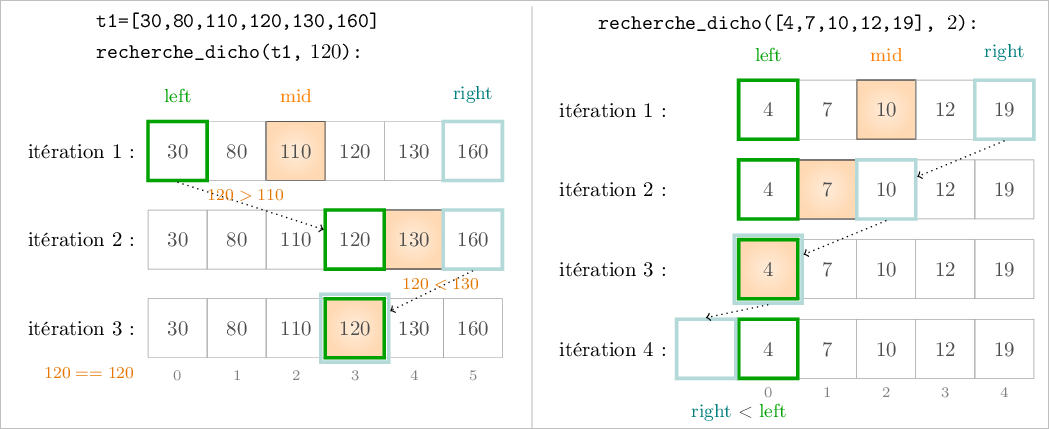

Le principe de la recherche dichotomique est de maintenir un intervalle `[idx_left, idx_right]` qui contient l’indice recherché. Considérons une recherche de la valeur `120` dans `t1`, comme illustré ci-dessus. L’intervalle est le tableau entier : `idx_left=0, idx_right=5`. L’indice au milieu étant `idx_mid=2`, on compare `120` à `t[2]`. Comme `120 > 110`, on va le chercher dans la moitié droite de `t` en décalant `idx_left` à `idx_mid+1 = 3`. Tant qu’on n’a pas trouvé la valeur, ou que l’intervalle n’est pas réduit à néant, on continue à le diviser en deux. Ici, le nouveau milieu est `t1[4]=130 > 120`, donc on décale `idx_right` à `idx_mid-1 = 3`. Le milieu est alors `3`, et `t[3]=120` donc on renvoie le résultat `3`.

On peut représenter par un arbre comme ci-dessous les séquences de comparaisons effectuées par la recherche dichotomique en fonction de la valeur cherchée :

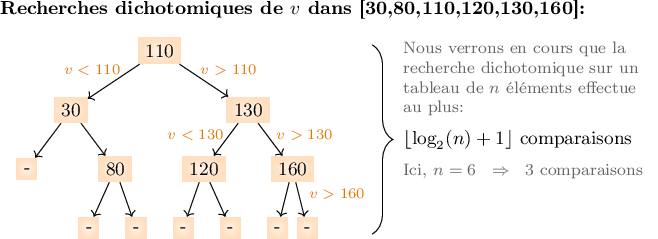

La recherche dichotomique est généralement beaucoup plus rapide que la recherche linéaire sur un grand tableau puisqu’à chaque itération on élimine la moitié des cases restantes au prix d’une seule comparaison.

**Question :** Sur le tableau de gauche, combien d’accès au tableau faut-il dans le pire cas avant de trouver une valeur que l’on cherche ou garantir son absence ? Et pour des tableaux de taille 1, 2 et 3 ? *(Le cas général d’un tableau de taille n est esquissé dans le cours)*

**Question :** Peut-on remplacer la division euclidienne `//` par la division `/` à la ligne 7 ? Et avec un arrondi supérieur ? (Essayer)

**Question :** Si l’on utilise en entrée un tableau non trié, risque-t-on de ne pas terminer ? d’obtenir un message d’erreur ? de ne pas trouver la valeur ?

Mesurer l’efficacité de la recherche dichotomique dans le pire cas.
-------------------------------------------------------------------

Le cours compare d’un point de vue théorique la complexité des deux algorithmes de recherche. Cette activité, elle, mesure expérimentalement le temps d’exécution de la recherche dichotomique à l’aide de la fonction `chrono` fournie dans le fichier (qui fait appel à la fonction Python `timeit.timeit`). On admettra ici que la recherche de $n + 7$ dans $p_n=[1, 2, ..., n]$ est un pire cas pour une entrée de taille $n$, que ce soit pour la recherche linéaire ou pour la recherche dichotomique.

**Activité 1 :** Comparer la durée des recherches linéaires et dichotomiques pour les valeurs 1 (meilleur cas) et 10<sup>6</sup> + 7 (pire cas) dans le tableau \[1, 2, ..., 10<sup>6</sup>\]. Comparer avec la recherche dichotomique.

In [ ]:
import timeit
import matplotlib.pyplot as plt
from math import log

def chrono(f,nb_repetitions):
    """ Calcule nb_repetitions fois la fonction f et renvoie le temps moyen - en secondes- d’un calcul de f. 
    L'expression f doit etre une fonction sans argument.
    Exemple d'utilisation : 
    t=[1,3,5]
    def f():
        return sorted(t)
    chrono(f, 4)
    """
    return timeit.timeit(f, number=nb_repetitions)/nb_repetitions


def recherche_lineaire(t, val):
    """ entree: tableau t, valeur x
    resultat: (premier) indice i tel que t[i] == x, ou -1 si x not in t.
    Le resultat reste correct que le tableau soit trie ou pas.
    """
    for i in range(len(t)):
        if t[i] == val:
            return i
    return -1


def recherche_lineaire_optimisee_tri(t, val):
    """ entree: tableau t trie par ordre croissant, valeur x
    resultat: (premier) indice i tel que t[i] == x, ou -1 si x not in t.
    N'est correcte que sur un tableau trie. Utilise l'ordre du tableau
    pour arreter la recherche plus tot dans certain cas.
    ----
    Nous ne l'utiliserons pas dans cette activite.
    """
    for i in range(len(t)):
        if t[i] >= val:
            if t[i] == val:
                return i
            else:
                return -1
    return -1

# Theoriquement pour construire un tableau, on devrait ecrire: [i for i in range(1,10**6+1)].
# Mais comme la valeur range() est une sequence (supporte les acces par indice), 
# on peut directement lui appliquer les fonctions de ce chapitre comme
# les recherches lineaire et dichotomique ou les tris, ce qui allege un peu le code.


In [ ]:
def f1():
    return recherche_lineaire(range(1,10**6+1),10**6+7)
def f2():
    return recherche_dichotomique(range(1,10**6+1),10**6+7)
def f3():
    return recherche_lineaire(range(1,10**6+1),1)
def f4():
    return recherche_dichotomique(range(1,10**6+1),1)

print("recherche linéaire d'une grande valeur :\t", chrono(f1,3))
print("recherche dichotomique d'une grande valeur :\t", chrono(f2,3))
print("recherche linéaire d'une petite valeur :\t", chrono(f3,3))
print("recherche linéaire d'une petite valeur :\t", chrono(f4,3))

# On observe que la recherche dichotomique est un peu plus lente pour trouver le premier element du tableau, 
# mais beaucoup plus rapide pour trouver le dernier, comme on peut s'y attendre.

**Activité 2 :** Exécuter la fonction `affiche_pire_cas1` du fichier, qui illustre la durée d’exécution des recherches linéaires et dichotomiques sur les tableaux $p_n$ avec $n$=10<sup>5</sup>, 2 × 10<sup>5</sup>, 3 × 10<sup>5</sup>, …, 10<sup>6</sup>. Le résultat est-il conforme à la complexité théorique ? Identifier le coefficient approximatif donnant le temps d’exécution du pire cas en fonction de *n* pour la recherche linéaire.

In [ ]:
import matplotlib.pyplot as plt

def durees_pire_cas(tailles, nb_repetitions, f):
    """
    Entree: 
    - un tableau tailles de nk entiers tries: n_0 < n_2 <...<n_(k-1), 
    - le nombre de fois qu'on va repeter chaque mesure
    - une fonction f qu'on suppose etre l'une des 2 fonctions suivantes:
    => recherche_lineaire, ou
    => recherche_dichotomique.
    ----
    Pour chaque n_i, effectue une recherche de n_i+7 dans [1,...,n_i].
    La recherche est effectuee nb_repetitions fois. 
    On calcule le temps total et le divise par le nombre de repetitions, ce qui donne la duree moyenne d'un calcul pour un tableau de cette taille.
    ----
    Sortie: renvoie un tableau durees.
    durees[i] contient la duree (en s) moyenne pour le pire cas de recherche dans [1,...n_i].
    """
    assert(tailles == sorted(tailles)) # Verification que p est par ordre croissant.
    nb = len(tailles)
    durees = [0]*nb
    for i in range(nb):
        n = tailles[i]
        t = [j for j in range(1,n+1)]
        durees[i] = chrono(lambda:f(t, n+7), nb_repetitions)
    return durees


def affiche_pire_cas1():
    """ Trace la duree d'execution pire cas de la recherche lineaire et binaire """
    tailles = [i*10**5 for i in range(1,11)]
    durees_lin = durees_pire_cas(tailles,3, recherche_lineaire)
    durees_dicho = durees_pire_cas(tailles,3, recherche_dichotomique)
    plt.clf()
    line1, = plt.plot(tailles, durees_lin, marker='o', label='recherche lineaire')
    line2, = plt.plot(tailles, durees_dicho, marker='*', label='recherche dicho')
    plt.xlabel('Taille du tableau')
    plt.ylabel('Duree (s)')
    plt.title("Duree d'une recherche pire cas")
    plt.legend(handles=[line1,line2])
    plt.show()